In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df=pd.read_excel('/content/drive/MyDrive/sydney_rain prediction.xlsx')

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

In [4]:
# Finding null values in the dataset
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [5]:
# Getting columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [6]:
# Dropping 'Date' and 'Location' columns as they are not required for our machine learning models
df=df.drop(columns=['Date','Location'],axis=1)

In [7]:
# Creating dummy variables for 'RainToday' and 'RainTomorrow' columns
df=pd.get_dummies(df,columns=['RainToday','RainTomorrow'],drop_first=True,dtype=int)

In [8]:
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0     19.5     22.4      15.6          6.2       0.0         92.0   
1     19.5     25.6       6.0          3.4       2.7         83.0   
2     21.6     24.5       6.6          2.4       0.1         88.0   
3     20.2     22.8      18.8          2.2       0.0         83.0   
4     19.7     25.7      77.4          NaN       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.9              1                 1  
1     24.8              1                 1  
2     23.0              1                 1  
3     20.9              1                 1  
4     25.5              1                 1

In [9]:
# Fill null values present in the dataset

# Fill null values with the mean of the respective columns
for column in df.columns:
  if df[column].isnull().any():
    df[column].fillna(df[column].mean(), inplace=True)


<ipython-input-9-c0554e391665>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [10]:
# Check if null values are still present
df.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

In [11]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     14.865057    23.002339     3.330231     5.187432     7.179374   
std       4.551593     4.493290     9.886270     2.756095     3.801737   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.300000   
50%      14.900000    22.800000     0.000000     4.800000     8.200000   
75%      18.700000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     68.229010    54.699158  1018.346156  1016.018774     4.181523   
std      15.053668    16.261752     7.000492     7.012157     2.505491   
min      19.000000    10.000000   986.700000   989.800000     0.000000   
25%      58.000000    44.000000  1013.800000  1011.300000     2.000000   
50%      69.000000    56.000000  1018.500000  1016.300000     4.181523   
75%      80.000000    64.000000  1023.100000  1020.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.700000     9.000000   

          Cloud3pm      Temp9am      Temp3pm  RainToday_Yes  RainTomorrow_Yes  
count  3337.000000  3337.000000  3337.000000    3337.000000       3337.000000  
mean      4.218660    17.819742    21.533333       0.259515          0.259215  
std       2.409531     4.894240     4.301156       0.438434          0.438269  
min       0.000000     6.400000    10.200000       0.000000          0.000000  
25%       2.000000    13.800000    18.400000       0.000000          0.000000  
50%       4.218660    18.200000    21.300000       0.000000          0.000000  
75%       7.000000    21.700000    24.500000       1.000000          1.000000  
max       8.000000    36.500000    44.700000       1.000000          1.000000

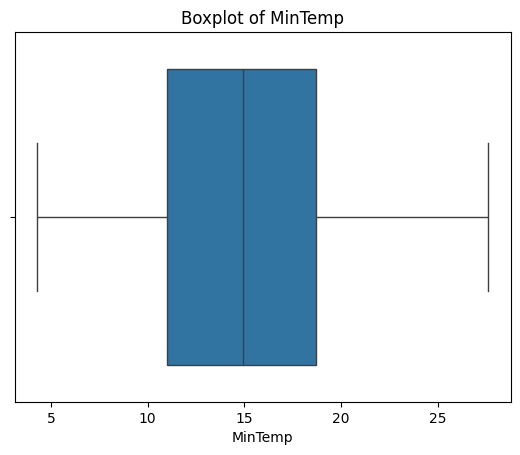

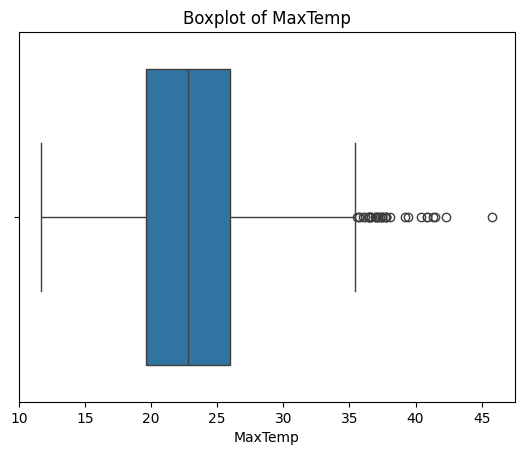

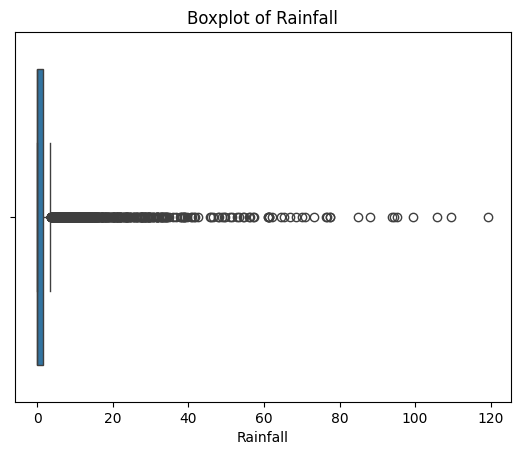

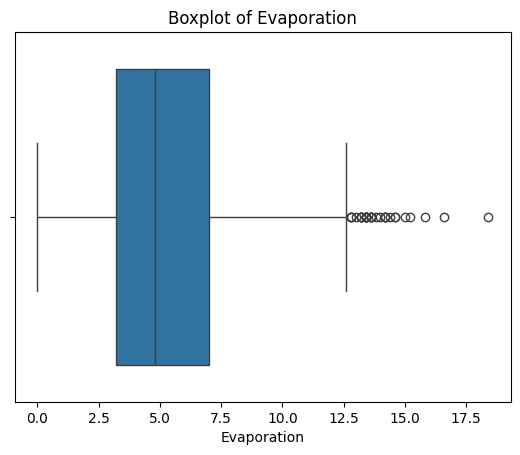

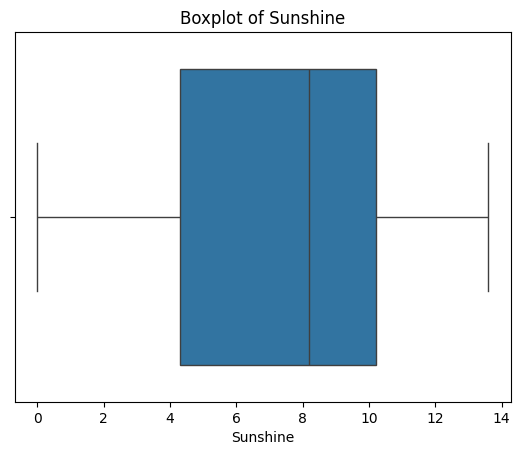

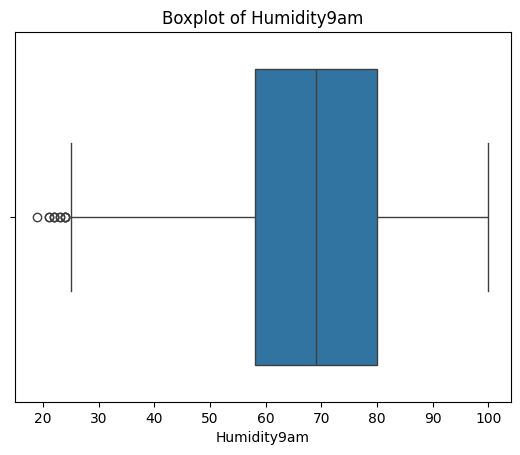

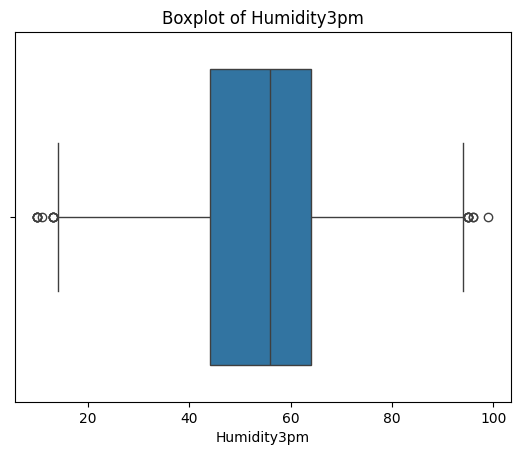

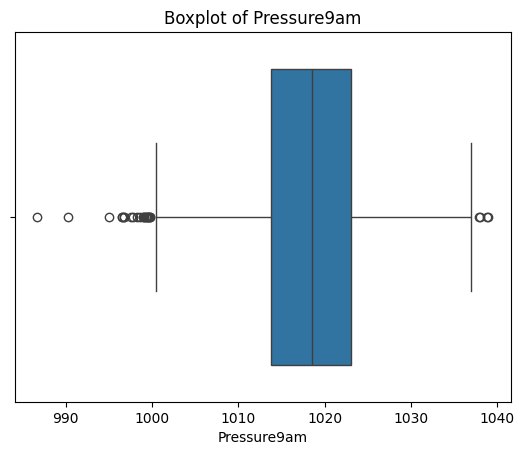

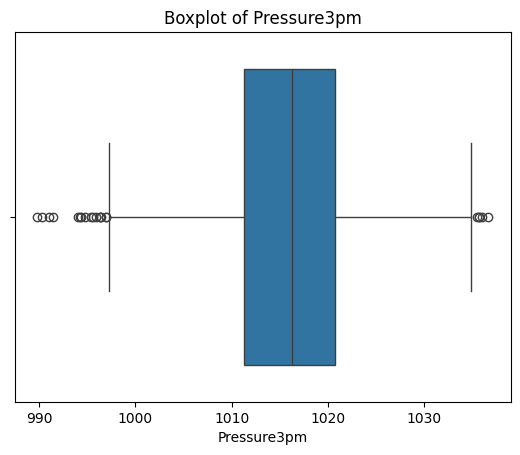

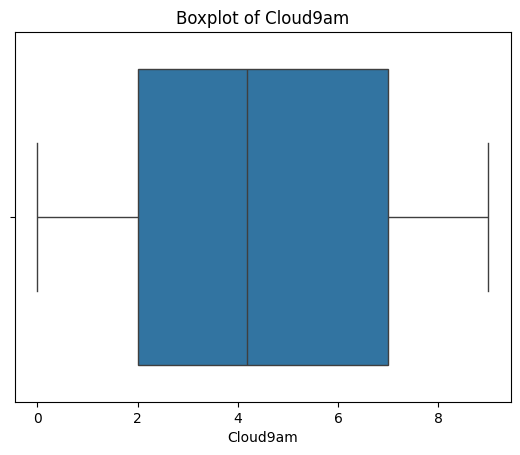

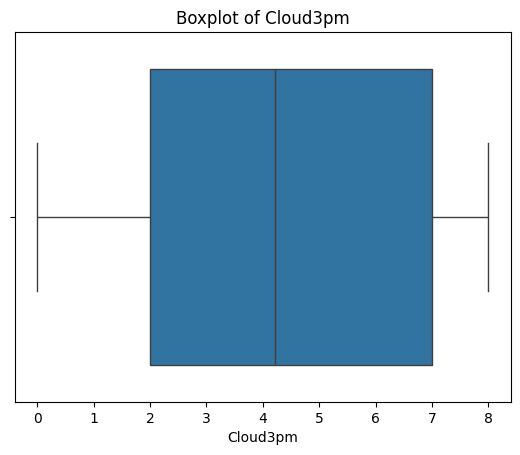

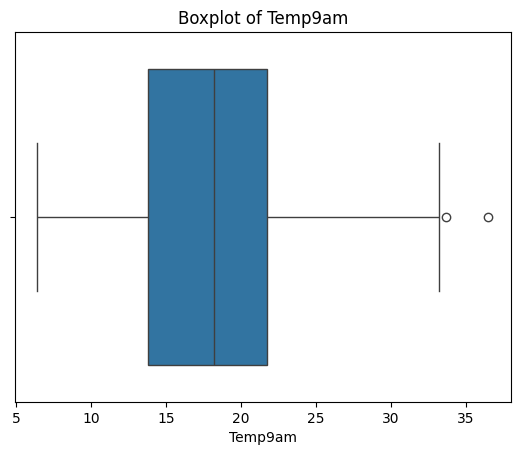

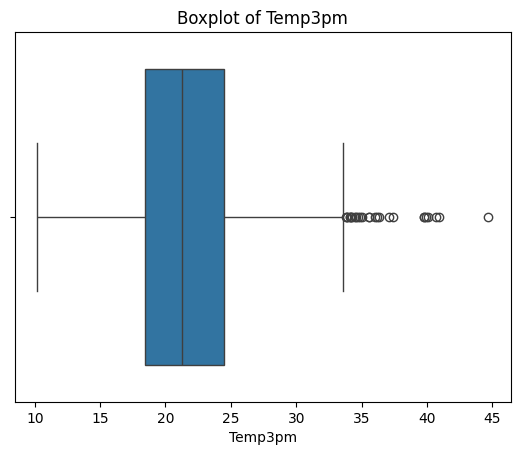

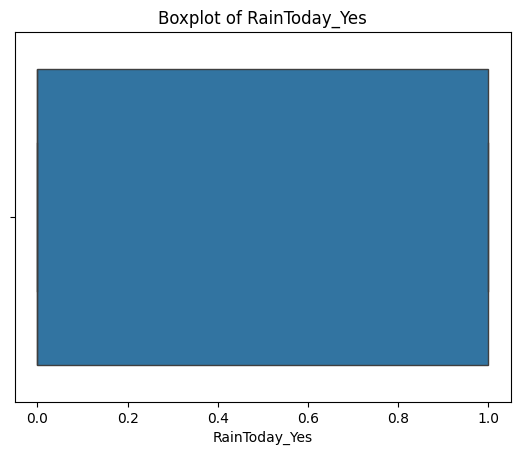

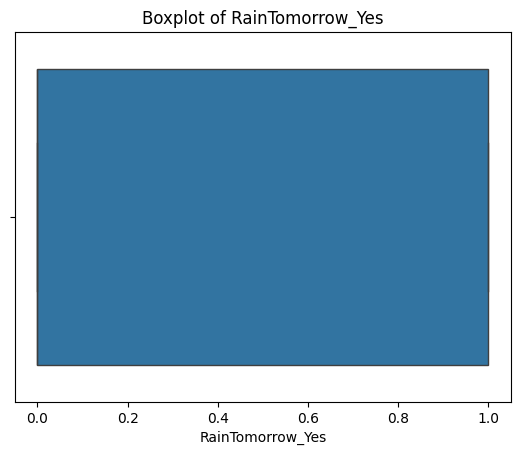

In [12]:
# Check outliers
# Create a boxplot for each column
for col in df.columns:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [13]:
# Outlier treatment

# Calculate the Interquartile Range (IQR) for each numerical feature
Q1 = df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

MinTemp              7.7
MaxTemp              6.4
Rainfall             1.4
Evaporation          3.8
Sunshine             5.9
Humidity9am         22.0
Humidity3pm         20.0
Pressure9am          9.3
Pressure3pm          9.5
Cloud9am             5.0
Cloud3pm             5.0
Temp9am              7.9
Temp3pm              6.1
RainToday_Yes        1.0
RainTomorrow_Yes     1.0
dtype: float64

In [14]:
# Find upper and lower values
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Replace outliers
for col in df.select_dtypes(include=np.number).columns:
  df[col] = np.where(df[col] < lower[col], lower[col], df[col])
  df[col] = np.where(df[col] > upper[col], upper[col], df[col])

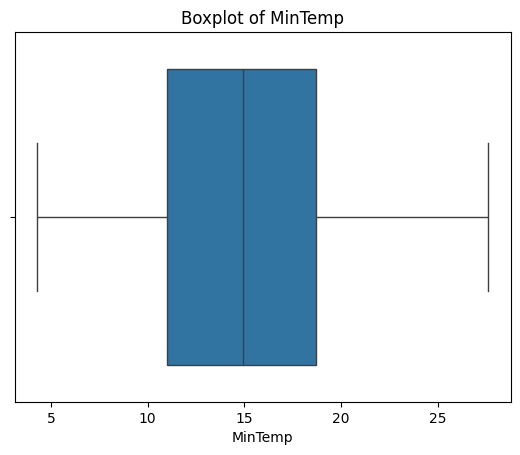

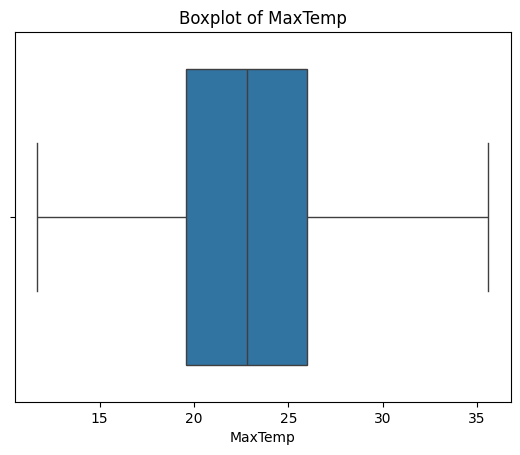

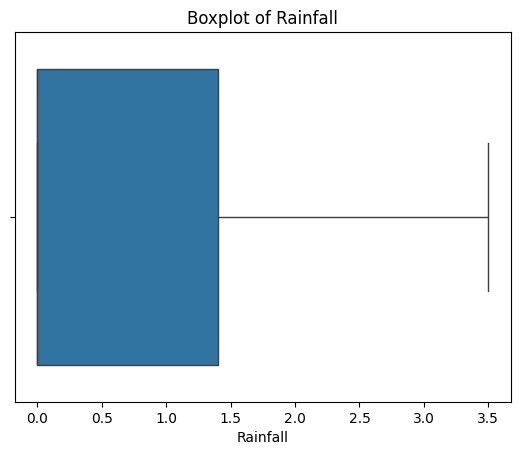

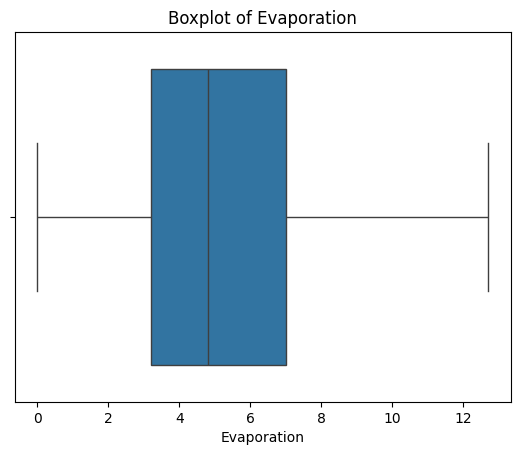

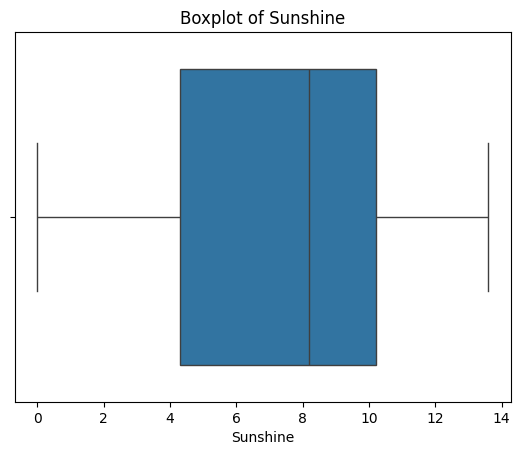

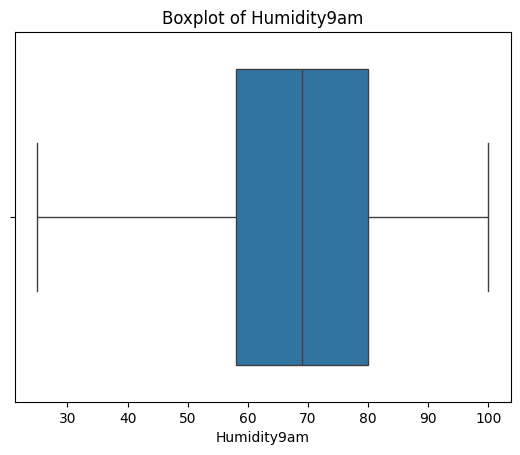

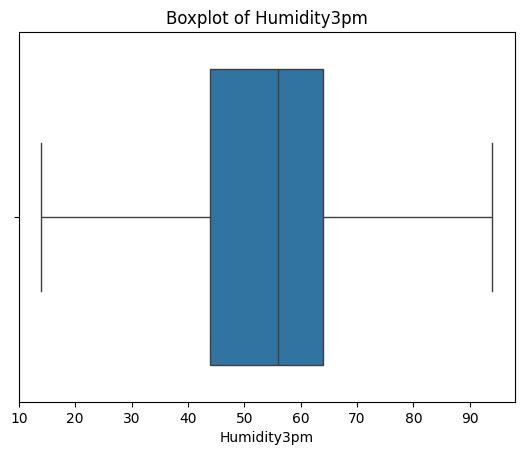

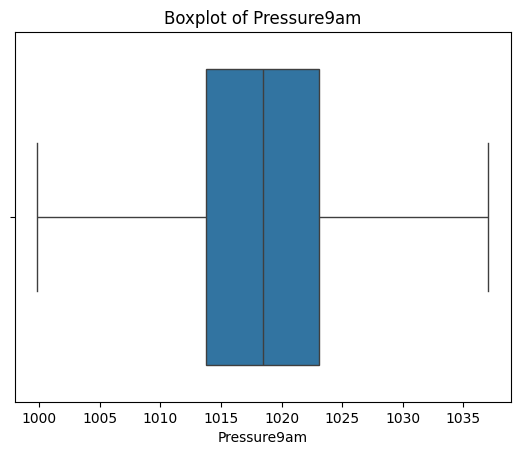

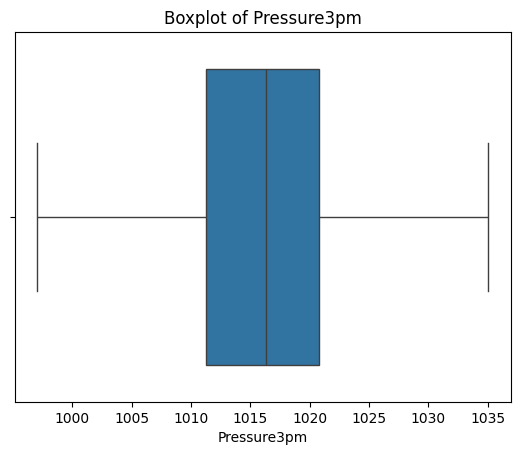

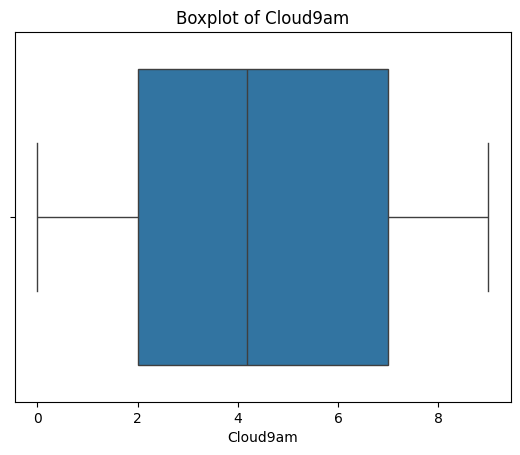

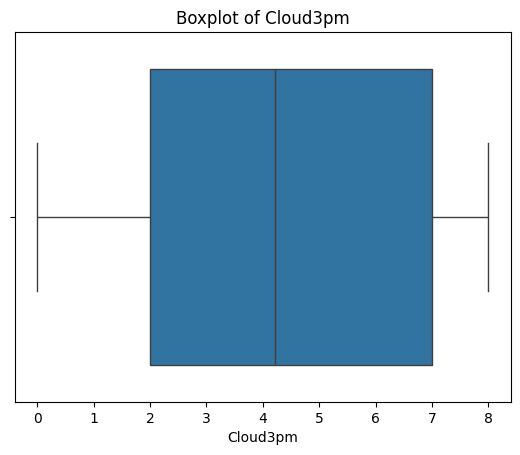

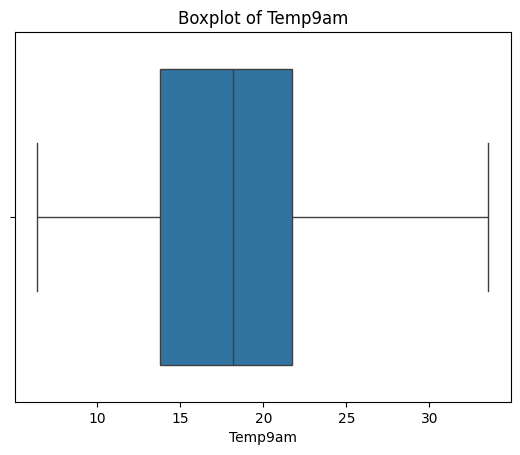

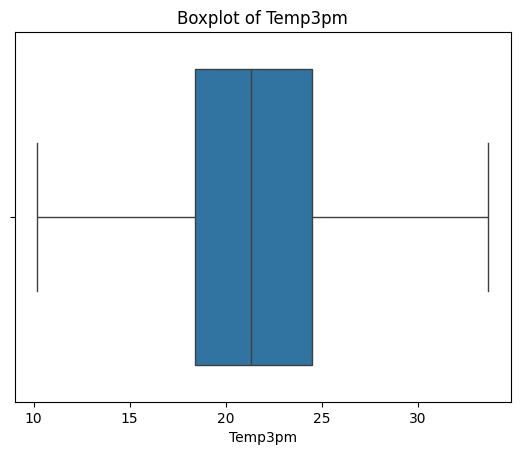

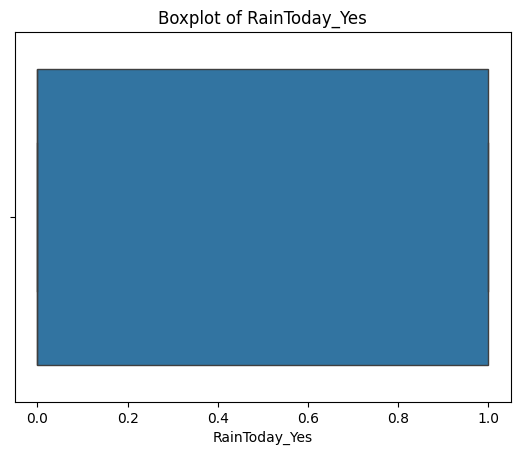

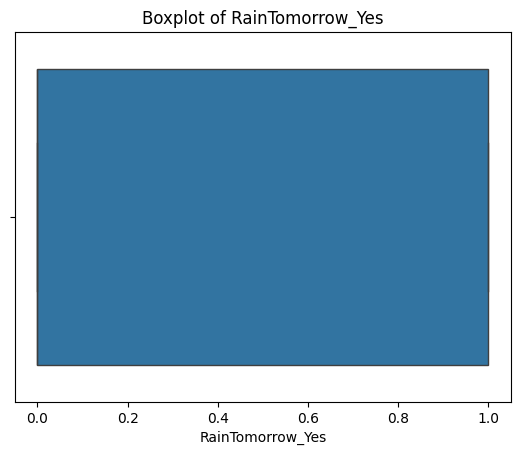

In [15]:
# Check for outliner in boxplot again
for col in df.columns:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [16]:
# Renaming  columns

df = df.rename(columns={'RainToday_Yes': 'RainToday', 'RainTomorrow_Yes': 'RainTomorrow'})

In [17]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     14.865057    22.977196     0.868919     5.174396     7.179374   
std       4.551593     4.409312     1.393618     2.714802     3.801737   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.300000   
50%      14.900000    22.800000     0.000000     4.800000     8.200000   
75%      18.700000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    35.600000     3.500000    12.700000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     68.238300    54.703353  1018.360271  1016.030446     4.181523   
std      15.025889    16.229354     6.946585     6.968893     2.505491   
min      25.000000    14.000000   999.850000   997.050000     0.000000   
25%      58.000000    44.000000  1013.800000  1011.300000     2.000000   
50%      69.000000    56.000000  1018.500000  1016.300000     4.181523   
75%      80.000000    64.000000  1023.100000  1020.800000     7.000000   
max     100.000000    94.000000  1037.050000  1035.050000     9.000000   

          Cloud3pm      Temp9am      Temp3pm    RainToday  RainTomorrow  
count  3337.000000  3337.000000  3337.000000  3337.000000   3337.000000  
mean      4.218660    17.818813    21.510199     0.259515      0.259215  
std       2.409531     4.890985     4.219776     0.438434      0.438269  
min       0.000000     6.400000    10.200000     0.000000      0.000000  
25%       2.000000    13.800000    18.400000     0.000000      0.000000  
50%       4.218660    18.200000    21.300000     0.000000      0.000000  
75%       7.000000    21.700000    24.500000     1.000000      1.000000  
max       8.000000    33.550000    33.650000     1.000000      1.000000

In [18]:
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0     19.5     22.4       3.5     6.200000       0.0         92.0   
1     19.5     25.6       3.5     3.400000       2.7         83.0   
2     21.6     24.5       3.5     2.400000       0.1         88.0   
3     20.2     22.8       3.5     2.200000       0.0         83.0   
4     19.7     25.7       3.5     5.187432       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm  RainToday  RainTomorrow  
0     20.9        1.0           1.0  
1     24.8        1.0           1.0  
2     23.0        1.0           1.0  
3     20.9        1.0           1.0  
4     25.5        1.0           1.0

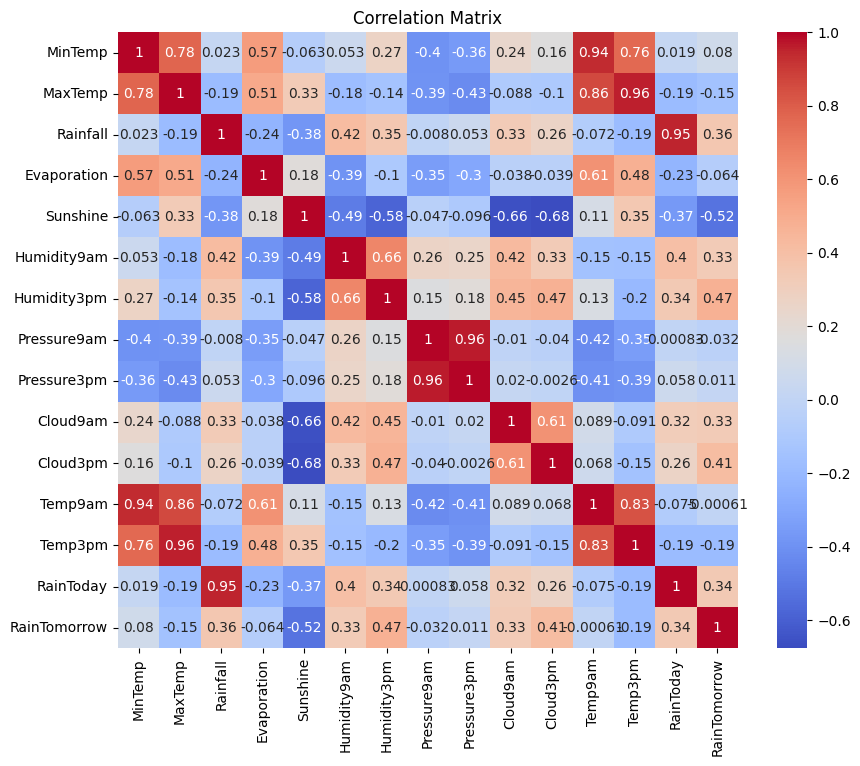

In [19]:
# Find correlation
correlation_matrix = df.corr()
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', cbar=True)

# Add title and labels
plt.title("Correlation Matrix")
plt.show()

## Using different classification models

## Logistic regression

In [20]:
#   logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define X and y
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create object
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the data for test and train set
y_pred_train= model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
accuracy_score_train = accuracy_score(y_train, y_pred_train)
print("Accuracy_score_train:", accuracy_score_train)

accuracy_score_test = accuracy_score(y_test, y_pred_test)
print("Accuracy_score_test:", accuracy_score_test)

print()
# Confusion matrix

print('confusion_matrix:',confusion_matrix(y_test, y_pred_test))


Accuracy_score_train: 0.8381416260771825
Accuracy_score_test: 0.8278443113772455

confusion_matrix: [[446  38]
 [ 77 107]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Linear Discriminant Analysis(LDA)

In [ ]:
# Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create a Linear Discriminant Analysis (LDA) object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model
lda.fit(X_train, y_train)

# Predict the data for test and train set
y_pred_train = lda.predict(X_train)
y_pred_test = lda.predict(X_test)


# Evaluate the model
accuracy_score_train = accuracy_score(y_train, y_pred_train)
print("Accuracy_score_train:", accuracy_score_train)

accuracy_score_test = accuracy_score(y_test, y_pred_test)
print("Accuracy_score_test:", accuracy_score_test)

print()
# Confusion matrix

print('confusion_matrix:',confusion_matrix(y_test, y_pred_test))


Accuracy_score_train: 0.8332708879730236
Accuracy_score_test: 0.8233532934131736

confusion_matrix: [[442  42]
 [ 76 108]]


# k-nearest neighbors (KNN)

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Standardize the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)        # transform x_train into scaler
X_test_s = scaler.transform(X_test)

# create object
knn = KNeighborsClassifier(n_neighbors=10)

# Predict the data for test and train set
y_pred_train= model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
accuracy_score_train = accuracy_score(y_train, y_pred_train)
print("Accuracy_score_train:", accuracy_score_train)

accuracy_score_test = accuracy_score(y_test, y_pred_test)
print("Accuracy_score_test:", accuracy_score_test)

print()
# Confusion matrix

print('confusion_matrix:',confusion_matrix(y_test, y_pred_test))

Accuracy_score_train: 0.8381416260771825
Accuracy_score_test: 0.8278443113772455

confusion_matrix: [[446  38]
 [ 77 107]]


# Decision tree classification

In [ ]:
# create decision tree
from sklearn import tree

# create object
clf_tree = tree.DecisionTreeClassifier(max_depth=5)

# fit the model
clf_tree.fit(X_train, y_train)

# Predict the values using trainig model
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

# Evaluate the model performance
print("Accuracy_score_train:", accuracy_score(y_train, y_train_pred))
print("Accuracy_score_test:", accuracy_score(y_test, y_test_pred))

print()
# confusion matrix for test set
print('confusion_matrix:',confusion_matrix(y_test, y_test_pred))



Accuracy_score_train: 0.8520044960659423
Accuracy_score_test: 0.8098802395209581

confusion_matrix: [[444  40]
 [ 87  97]]


# Plotting decision tree

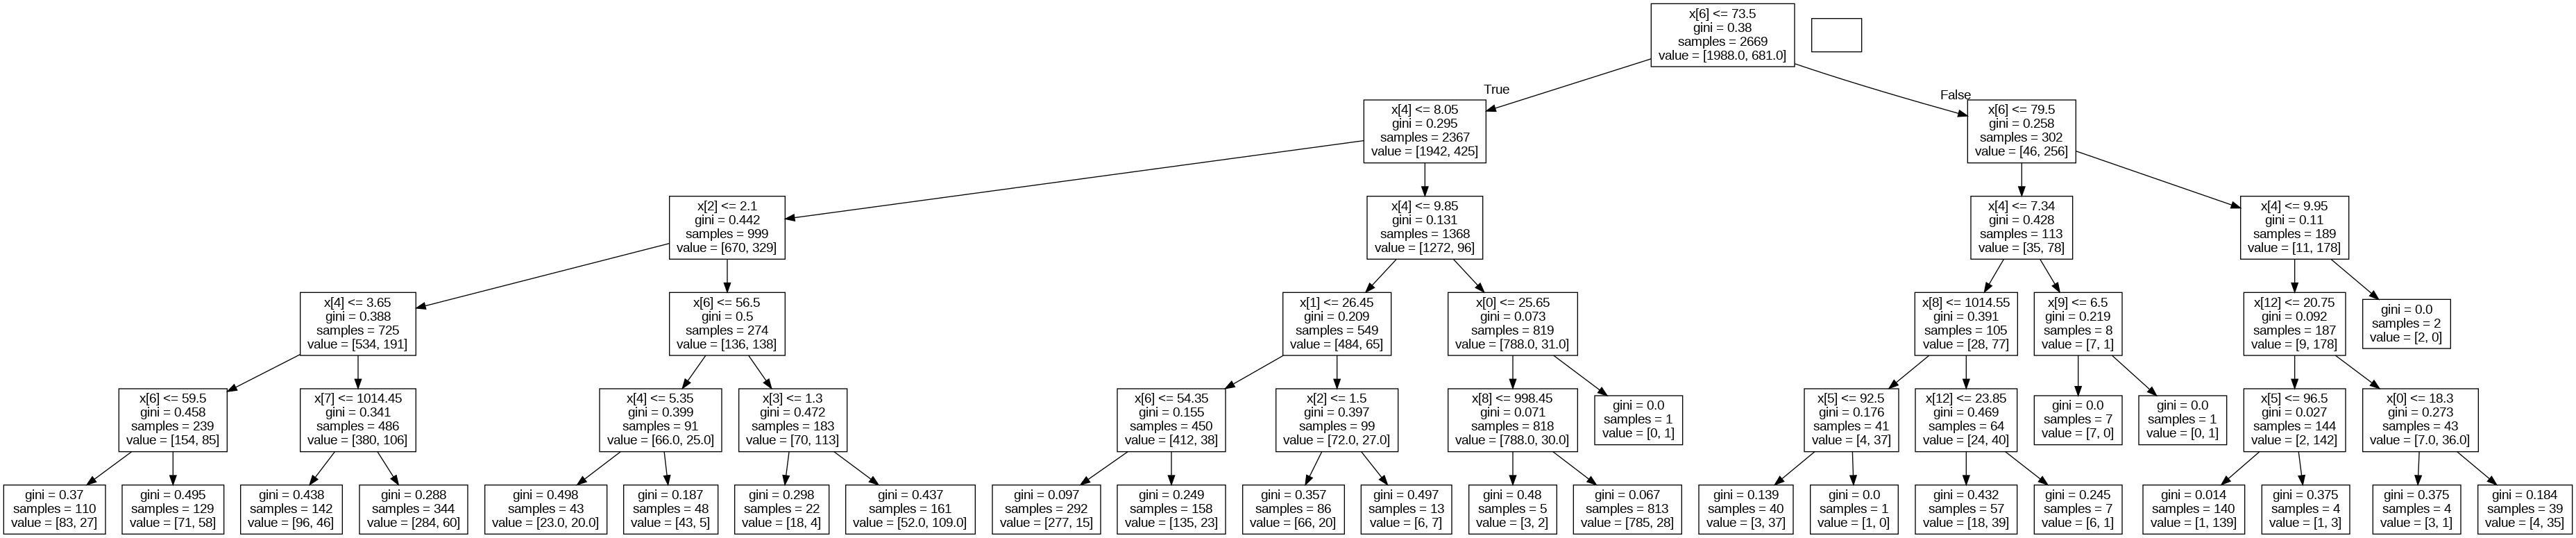

In [ ]:
dot_data = tree.export_graphviz(clf_tree, out_file= None)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Pruning  decision tree

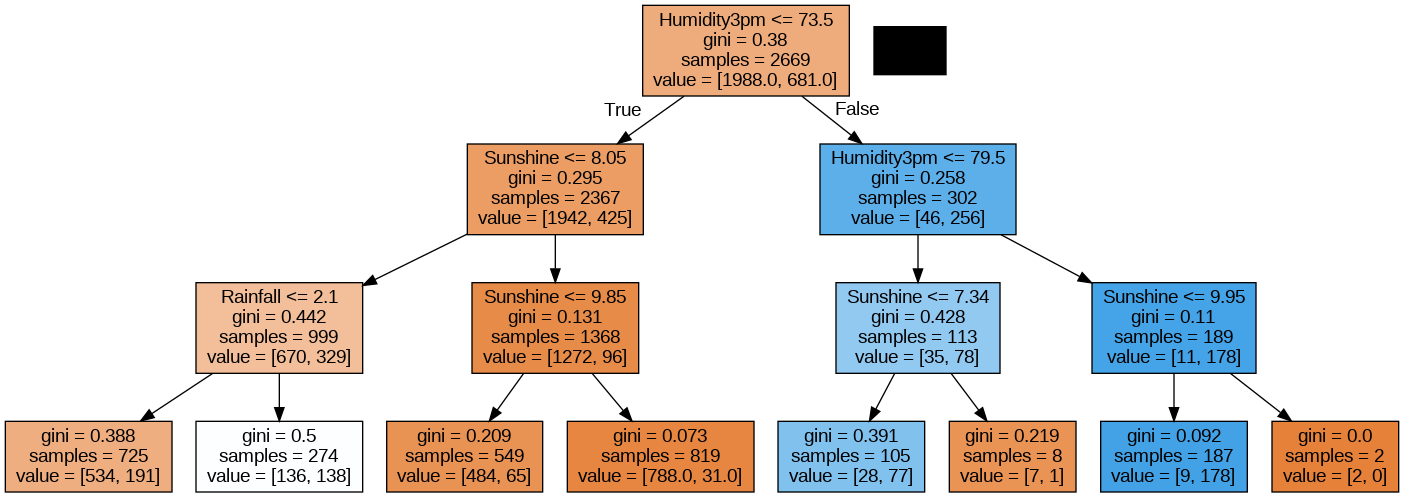

In [ ]:
# Create object
clf_tree1 = tree.DecisionTreeClassifier(max_depth=3)

# Fit the model
clf_tree1.fit(X_train, y_train)

# plot decision tree
dot_data1 = tree.export_graphviz(clf_tree1, out_file= None, feature_names= X_train.columns, filled =True)
graph1 = pydotplus.graph_from_dot_data(dot_data1)
Image(graph1.create_png())

## Evaluating performance for this decision tree(clf_tree1)

In [ ]:
# Evaluate model performance

print("Accuracy_score_train:", accuracy_score(y_train, clf_tree1.predict(X_train)))
print("Accuracy_score_test:", accuracy_score(y_test, clf_tree1.predict(X_test)))

print()
# confusion matrix for test set
print('confusion_matrix:',confusion_matrix(y_test, clf_tree1.predict(X_test)))

Accuracy_score_train: 0.8272761333832896
Accuracy_score_test: 0.8023952095808383

confusion_matrix: [[430  54]
 [ 78 106]]


## Pruning minimum observation at internal node


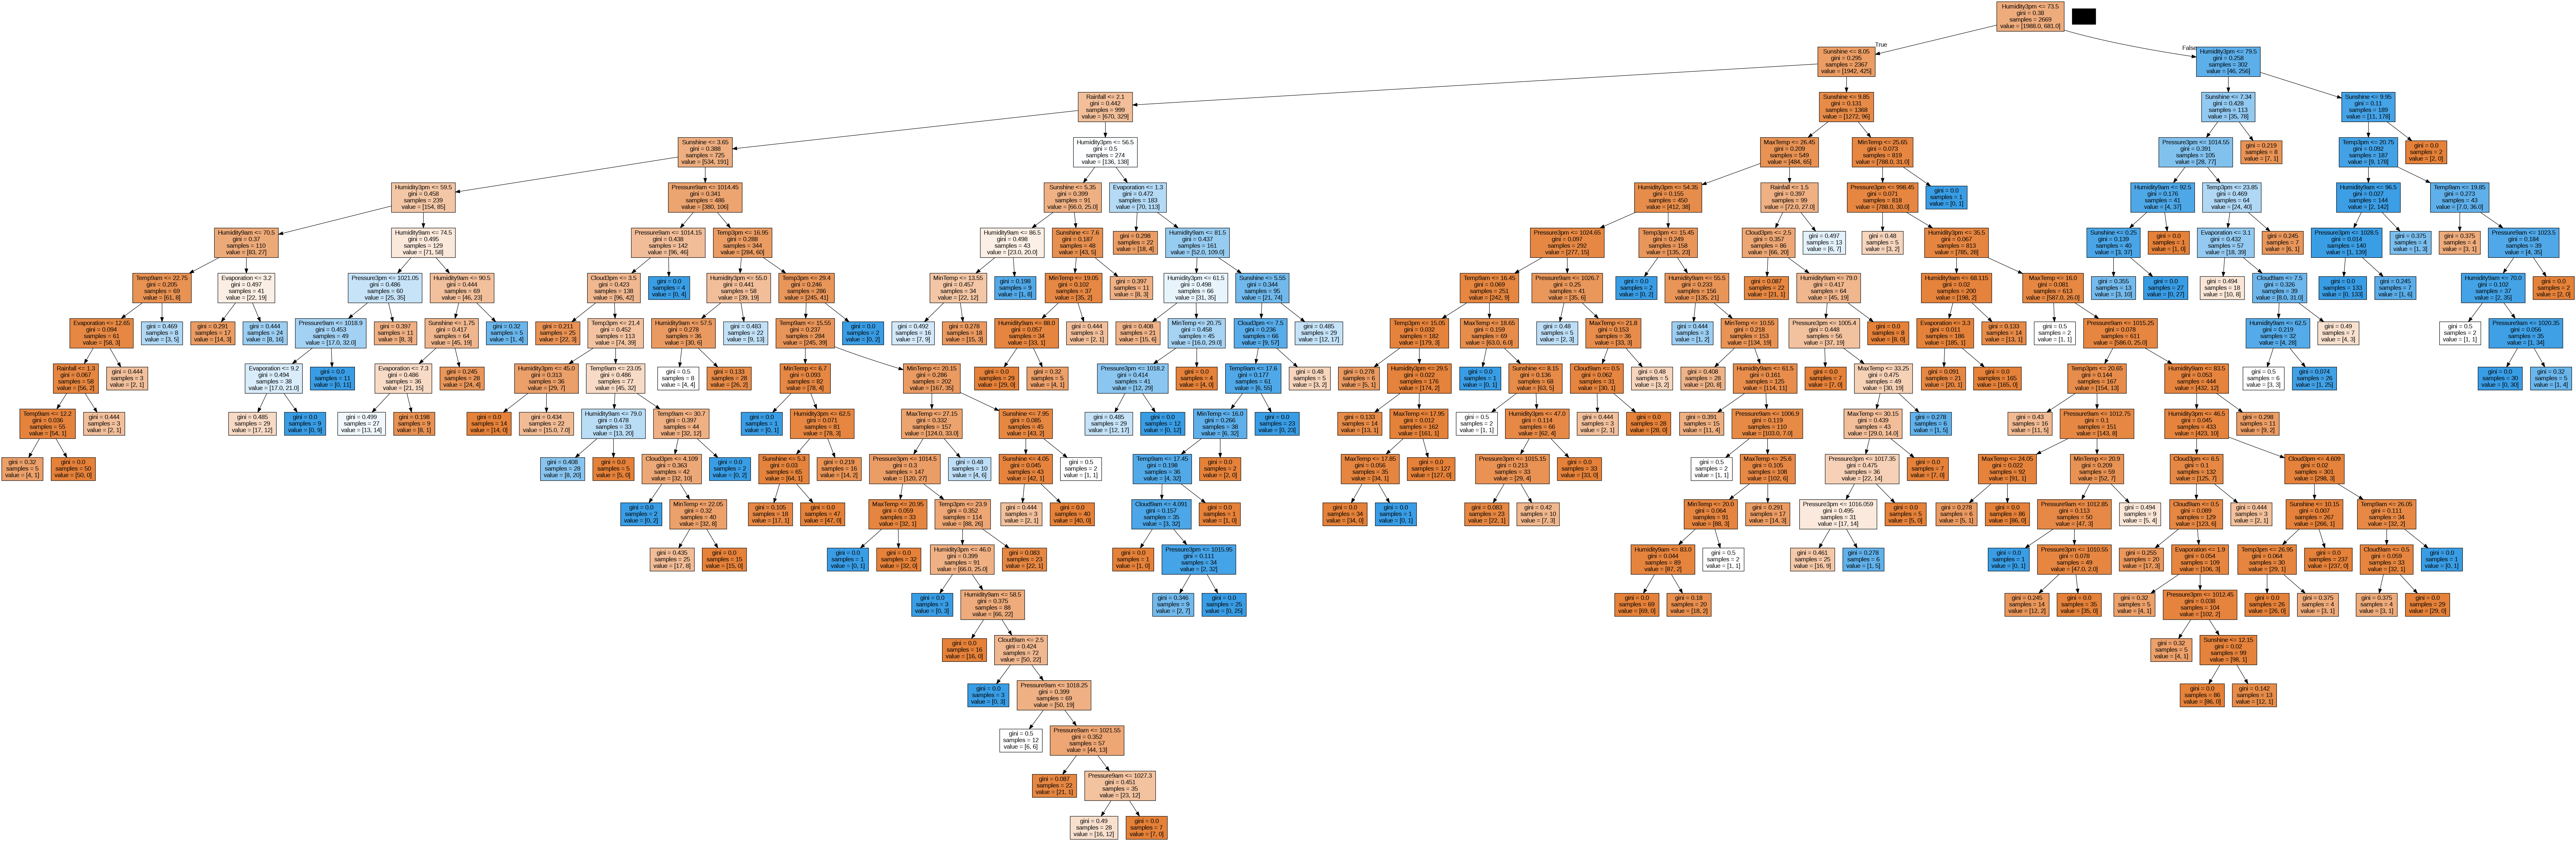

In [ ]:
# Create object
clf_tree2 = tree.DecisionTreeClassifier(min_samples_split = 30)

# Fit the model
clf_tree2.fit(X_train, y_train)

# plot decision tree
dot_data1 = tree.export_graphviz(clf_tree2, out_file= None, feature_names= X_train.columns, filled =True)
graph1 = pydotplus.graph_from_dot_data(dot_data1)
Image(graph1.create_png())

## Evaluating performance for this decision tree(clf_tree2)

In [ ]:
# Evaluate model performance

print("Accuracy_score_train:", accuracy_score(y_train, clf_tree2.predict(X_train)))
print("Accuracy_score_test:", accuracy_score(y_test, clf_tree2.predict(X_test)))

print()
# confusion matrix for test set
print('confusion_matrix:',confusion_matrix(y_test, clf_tree2.predict(X_test)))

Accuracy_score_train: 0.895841139003372
Accuracy_score_test: 0.7829341317365269

confusion_matrix: [[414  70]
 [ 75 109]]


## Pruning minimum observation at leaf node

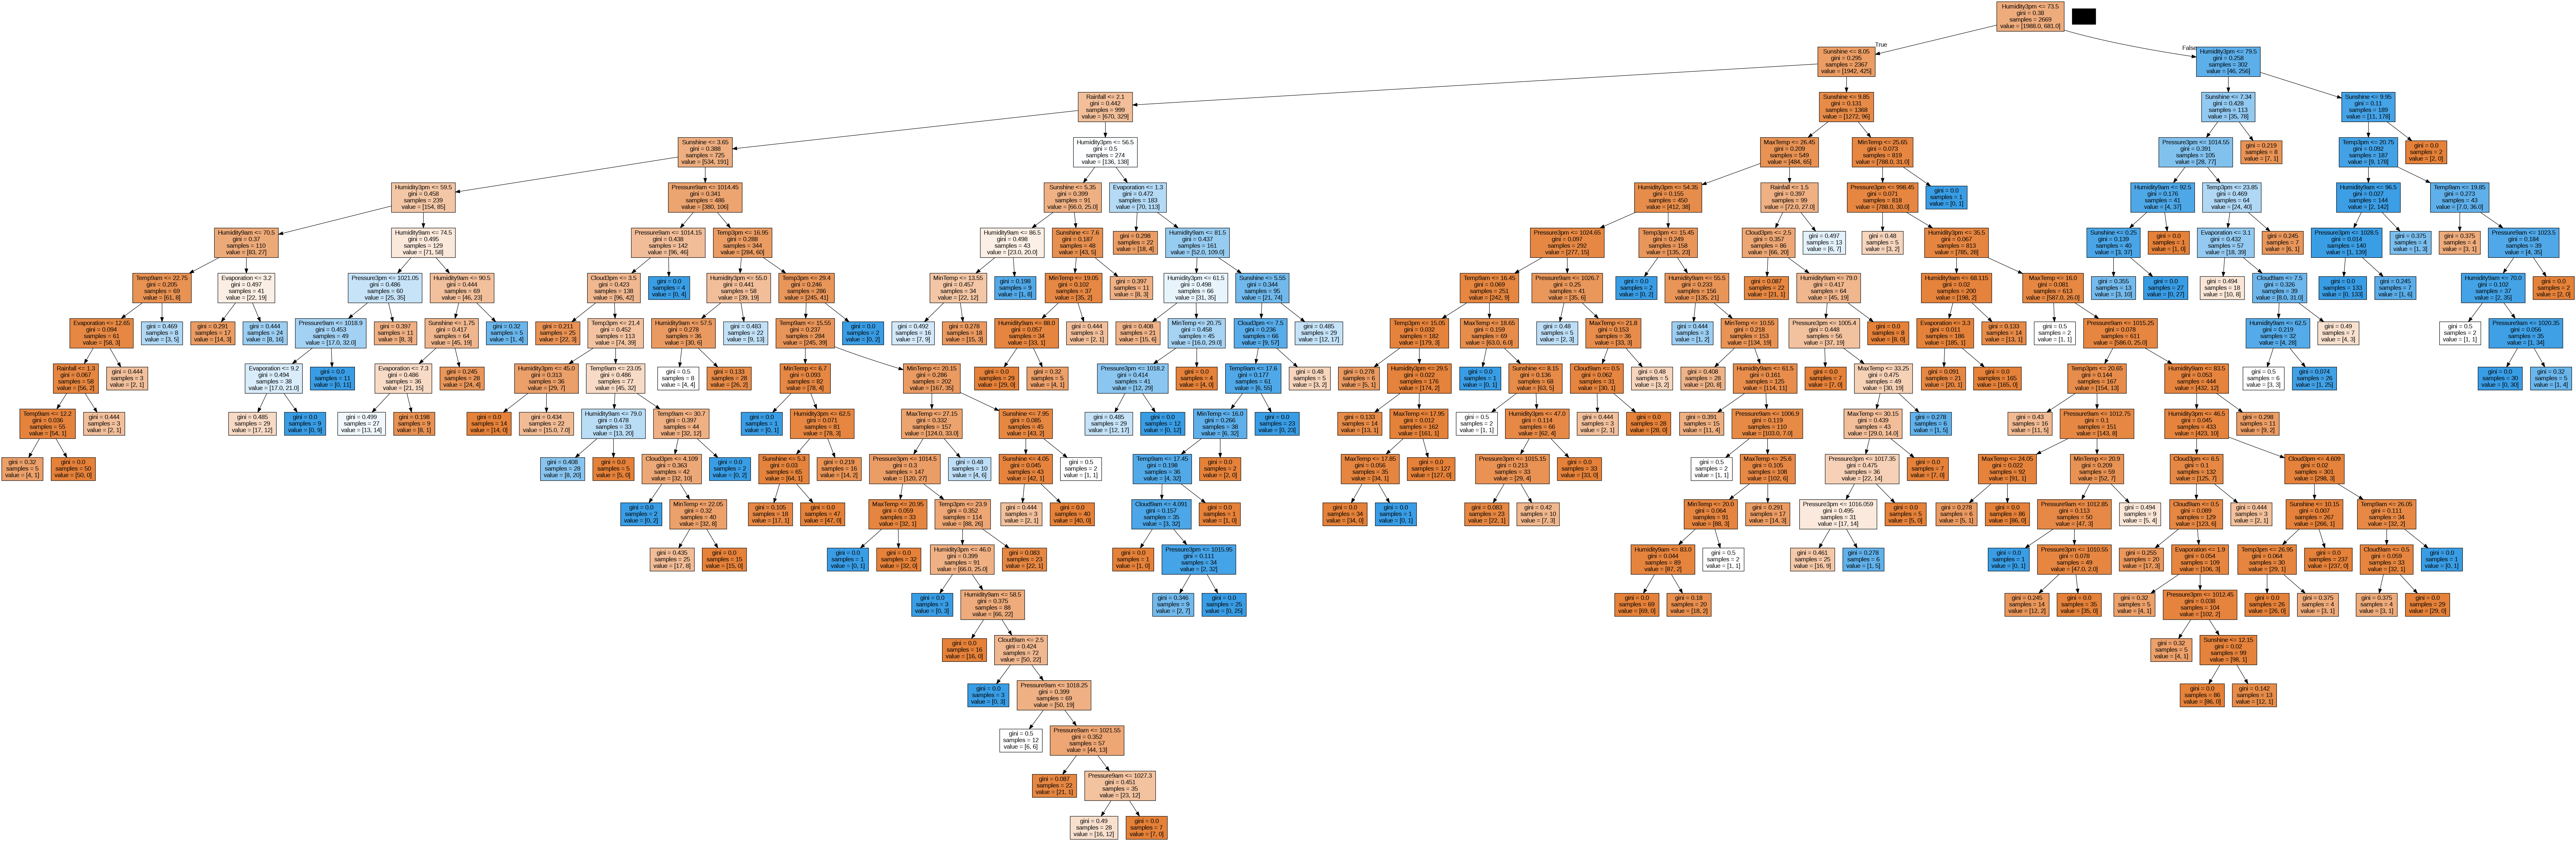

In [ ]:
# Create object
clf_tree3 = tree.DecisionTreeClassifier(min_samples_leaf = 30, max_depth = 5)

# Fit the model
clf_tree3.fit(X_train, y_train)

# plot decision tree
dot_data1 = tree.export_graphviz(clf_tree2, out_file= None, feature_names= X_train.columns, filled =True)
graph1 = pydotplus.graph_from_dot_data(dot_data1)
Image(graph1.create_png())

## Evaluating performance for this decision tree(clf_tree3)

In [ ]:
# Evaluate model performance

print("Accuracy_score_train:", accuracy_score(y_train, clf_tree3.predict(X_train)))
print("Accuracy_score_test:", accuracy_score(y_test, clf_tree3.predict(X_test)))

print()
# confusion matrix for test set
print('confusion_matrix:',confusion_matrix(y_test, clf_tree3.predict(X_test)))

Accuracy_score_train: 0.8452603971524916
Accuracy_score_test: 0.811377245508982

confusion_matrix: [[457  27]
 [ 99  85]]


# Bagging method

In [ ]:
# Import Tree
from sklearn import tree

# Create classification object
clf_tree = tree.DecisionTreeClassifier(max_depth=4)

# Import bagging classifier
from sklearn.ensemble import BaggingClassifier

# Create bagging classifier object
bag_clf = BaggingClassifier(estimator=clf_tree, n_estimators=500,bootstrap=True,n_jobs= -1, random_state=42)

# Fit the model
bag_clf.fit(X_train, y_train)

# Evaluate model performance
print("Accuracy_score_train:", accuracy_score(y_train, bag_clf.predict(X_train)))
print("Accuracy_score_test:", accuracy_score(y_test, bag_clf.predict(X_test)))

print()
# confusion matrix for test set
print('confusion_matrix:',confusion_matrix(y_test, bag_clf.predict(X_test)))

Accuracy_score_train: 0.8478831022855002
Accuracy_score_test: 0.8248502994011976

confusion_matrix: [[459  25]
 [ 92  92]]


# Random forest method

In [33]:
# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create random forest classifier object
rf_clf = RandomForestClassifier(n_estimators=300,max_depth=3, n_jobs=-1, random_state=42)

# Fit the model
rf_clf.fit(X_train,y_train)

# Evaluate model performance
print("Accuracy_score_train:", accuracy_score(y_train, rf_clf.predict(X_train)))
print("Accuracy_score_test:", accuracy_score(y_test, rf_clf.predict(X_test)))

print()
# confusion matrix for test set
print('confusion_matrix:',confusion_matrix(y_test, rf_clf.predict(X_test)))

Accuracy_score_train: 0.8433870363431997
Accuracy_score_test: 0.8263473053892215

confusion_matrix: [[465  19]
 [ 97  87]]


# Using GridSearchCV in random forest classifier

In [ ]:
# Import GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_rf_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Evaluate the model with the best hyperparameters
y_train_pred = best_rf_clf.predict(X_train)
y_test_pred = best_rf_clf.predict(X_test)

print("Accuracy_score_train:", accuracy_score(y_train, y_train_pred))
print("Accuracy_score_test:", accuracy_score(y_test, y_test_pred))

print()
# Confusion matrix for test set
print('confusion_matrix:', confusion_matrix(y_test, y_test_pred))


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy_score_train: 0.8568752341701011
Accuracy_score_test: 0.8248502994011976

confusion_matrix: [[461  23]
 [ 94  90]]


# Gradient Boosting

In [ ]:
# Import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# Create gradient boosting object
gbc_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42)

# Fit the model
gbc_clf.fit(X_train, y_train)

# Evaluate model performance
print("Accuracy_score_train:", accuracy_score(y_train, gbc_clf.predict(X_train)))
print("Accuracy_score_test:", accuracy_score(y_test, gbc_clf.predict(X_test)))

print()
# confusion matrix for test set
print('confusion_matrix:',confusion_matrix(y_test, gbc_clf.predict(X_test)))

Accuracy_score_train: 0.8883476957662045
Accuracy_score_test: 0.8203592814371258

confusion_matrix: [[447  37]
 [ 83 101]]


# Ada Boost

In [24]:
# Import ada boost classifier
from sklearn.ensemble import AdaBoostClassifier

# Create ada boost object
ada_clf = AdaBoostClassifier(n_estimators=500, learning_rate=0.01, random_state=42)

# Fit the model
ada_clf.fit(X_train, y_train)

# Evaluate model performance
print("Accuracy_score_train:", accuracy_score(y_train, ada_clf.predict(X_train)))
print("Accuracy_score_test:", accuracy_score(y_test, ada_clf.predict(X_test)))

print()
# confusion matrix for test set
print('confusion_matrix:',confusion_matrix(y_test, ada_clf.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy_score_train: 0.8370176095916073
Accuracy_score_test: 0.8248502994011976

confusion_matrix: [[466  18]
 [ 99  85]]


# Ada boost using GridSearchCV

In [ ]:
# Create ada boost object
ada_clf = AdaBoostClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_ada_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Evaluate the model with the best hyperparameters
y_train_pred = best_ada_clf.predict(X_train)
y_test_pred = best_ada_clf.predict(X_test)

print("Accuracy_score_train:", accuracy_score(y_train, y_train_pred))
print("Accuracy_score_test:", accuracy_score(y_test, y_test_pred))

print()
# Confusion matrix for test set
print('confusion_matrix:', confusion_matrix(y_test, y_test_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}
Accuracy_score_train: 0.8433870363431997
Accuracy_score_test: 0.8263473053892215

confusion_matrix: [[462  22]
 [ 94  90]]


# XGBoost

In [28]:
# Import xgboost
import xgboost as xgb

# Create xgboost object
xgb_clf = xgb.XGBClassifier(n_estimators = 300, max_depth=3, learning_rate = 0.01, n_jobs= -1)

# Fit the model
xgb_clf.fit(X_train, y_train)

# Evaluate model performance
print("Accuracy_score_train:", accuracy_score(y_train, xgb_clf.predict(X_train)))
print("Accuracy_score_test:", accuracy_score(y_test, xgb_clf.predict(X_test)))

print()
# confusion matrix for test set
print('confusion_matrix:',confusion_matrix(y_test, xgb_clf.predict(X_test)))

Accuracy_score_train: 0.8478831022855002
Accuracy_score_test: 0.8308383233532934

confusion_matrix: [[461  23]
 [ 90  94]]


# Using xgboost with GridSearchCV

In [48]:
# Create xgboost object
xgb_clf = xgb.XGBClassifier(random_state=42, n_jobs=-1)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_xgb_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

print()
# Evaluate the model with the best hyperparameters
y_train_pred = best_xgb_clf.predict(X_train)
y_test_pred = best_xgb_clf.predict(X_test)

print("Accuracy_score_train:", accuracy_score(y_train, y_train_pred))
print("Accuracy_score_test:", accuracy_score(y_test, y_test_pred))

print()
# Confusion matrix for test set
print('confusion_matrix:', confusion_matrix(y_test, y_test_pred))

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}

Accuracy_score_train: 0.8696140876732859
Accuracy_score_test: 0.8188622754491018

confusion_matrix: [[449  35]
 [ 86  98]]


## XGBoost with tuned parameters

In [32]:
# Create xgboost object with optimized parameters
xgb_clf = xgb.XGBClassifier(n_estimators=153, max_depth=3, learning_rate=0.02,
                             subsample=0.8, colsample_bytree=0.8,
                             reg_alpha=0.1, reg_lambda=0.1,
                             n_jobs=-1, random_state=42)

# Fit the model
xgb_clf.fit(X_train, y_train)

# Evaluate model performance
print("Accuracy_score_train:", accuracy_score(y_train, xgb_clf.predict(X_train)))
print("Accuracy_score_test:", accuracy_score(y_test, xgb_clf.predict(X_test)))

print()
# Confusion matrix for test set
print('confusion_matrix:', confusion_matrix(y_test, xgb_clf.predict(X_test)))


Accuracy_score_train: 0.8493817909329336
Accuracy_score_test: 0.8323353293413174

confusion_matrix: [[461  23]
 [ 89  95]]


# Questions

1. Your views about the problem statement?
2. What will be your approach to solving this task?
3. What were the available ML model options you had to perform this task?
4. Which model’s performance is best and what could be the possible reason for that?
5. What steps can you take to improve this selected model’s performance even further?


# Answers

Ques 1. Your views about the problem statement?

Ans. My view about the problem statement:
* We have to create a machine learning model for a newspaper company called "The Daily Buzz " to accurately predict the rainfall in Sydney.
* For that we have to use classification techniques such as decision tree classifiers and ensemble methods can be useful in predicting the rainfall.

* Weather prediction includes analyzing several factors such as
temperature, humidity, wind speed, precipitation etc.

* These factors can be employed to predict the weather by integrating multiple decision trees or ensemble methods resulting in a more accurate forecasting model for the 'The Daily Buzz' company.


* For that we have to import the data and run several classification models to compare the accuracy score and select the most appropriate model.



Ques 2. What will be your approach to solving this task?

Ans. My approach to solve this task:
* As we have to predict the rainfall in Sydney using different classification methods, first we have to import the data in our Collab or jupyter notebook.

* After importing, we have review the data and implement the necessary cleaning procedures to ensure its accuracy and consistency.

* we have to look if there any null values in the dataset or any outliers are present or not, if they are present we have to treat them  accordingly.

* After that we will initiate the process of running multiple classification models to analyze their performance.

* Then, we will apply various models and evaluate their performance using performance measures(such as accuracy score and confusion matrix) to identify the best-performing model.

Ques 3. What were the available ML model options you had to perform this task?

Ans 3. Available ML model options to perform this task:

1. Logistic regression
2. Linear Discriminant Analysis(LDA)
3. k-nearest neighbors (KNN)
4. Classification decision tree
5. Bagging method
6. Random forest method
7. Gradient Boosting
8. Ada boost
9. Xgboost

Ques 4. Which model’s performance is best and what could be the possible reason for that?

Ans. XGBoost (Extreme Gradient Boosting) is the most effective model due to its superior performance compared to all other models.
* Xgboost model after tuning some parameters, gave   Accuracy_score_train: 0.8490071187710753 and  
Accuracy_score_test: 0.8323353293413174 which is best among all other models that i performed.
   * Also there is no overfitting or underfitting in this model so that's the reason why i selected this as my best model.

* Reason why xgboost performed better than other models:

    * XGBoost uses a boosting technique, where models are built step by step, with each new model correcting the errors of its previous one leading to handle complex datasets.

    * XGBoost provides insights into feature importance,allowing you to understand which features contribute most to the predictions.

    * XGB model performance is better because it can effectively handle complex relationship and ability to build deep trees.

    * XGB model also have regularization methods to prevent overfitting and can efficient do computation for better performance.

Ques 5. What steps can you take to improve this selected model’s performance even further?

Ans. Steps to Enhance Model Performance:

1.  Feature Selection:
  - Use techniques like feature importance from XGBoost to identify the most relevant features.
  - Remove redundant or irrelevant features that might be adding noise to the model.
2. Hyperparameter Tuning:

 -  n_estimators: Adjust the number of trees.
 - learning_rate: Control the contribution of each tree.
 - max_depth: Set the maximum depth of trees to prevent overfitting.
 - subsample: Adjust the fraction of samples used for training.
 - colsample_bytree: Control the fraction of features used for each tree.
 - gamma: Increase to make the algorithm more conservative.
2. Cross-Validation:

  - K-Fold Cross-Validation: Ensure that you use k-fold cross-validation for a more reliable estimate of model performance.

3. Use more Ensemble Methods:
 - Combine multiple XGBoost models trained with different hyperparameters or on different subsets of data using ensemble methods such as AdaBoost or bagging, to enhance model predictive power and accuracy.

4. Grid Search or Random Search:
 -  Use techniques like GridSearchCV or RandomizedSearchCV to systematically explore various hyperparameter combinations.

5. Data Augmentation:
  - Enhancing or increasing the dataset size through data augmentation techniques ( synthetic data) can lead to improved model performance, particularly when the initial dataset is small, resulting in higher performance measures such as the accuracy score.